In [1]:
import tensorflow as tf

In [2]:
img_width, img_height, img_num_channels = 224, 224, 3
loss_function = 'binary_crossentropy'
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
batch_size = 32
no_epochs = 30
validation_split = 0.2
verbosity = 1

In [4]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=validation_split
)

In [5]:
train_generator = train_datagen.flow_from_directory(
    'dataset/',  # Make sure to point to the root directory of your images
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

Found 744 images belonging to 2 classes.


In [6]:
validation_generator = train_datagen.flow_from_directory(
    'dataset/',  # Make sure to point to the root directory of your images
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

Found 186 images belonging to 2 classes.


In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(img_width, img_height, img_num_channels)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [15]:
model.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 batch_normalization_6 (Batc  (None, 111, 111, 32)     128       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                      

In [16]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=no_epochs,
    verbose=verbosity
)

Epoch 1/30
23/23 [==============================] - 13s 532ms/step - loss: 21.0505 - accuracy: 0.7500 - val_loss: 163.5540 - val_accuracy: 0.5063
Epoch 2/30
23/23 [==============================] - 12s 485ms/step - loss: 14.2406 - accuracy: 0.7992 - val_loss: 95.7514 - val_accuracy: 0.4812
Epoch 3/30
23/23 [==============================] - 12s 522ms/step - loss: 4.7792 - accuracy: 0.8104 - val_loss: 53.1589 - val_accuracy: 0.5000
Epoch 4/30
23/23 [==============================] - 12s 506ms/step - loss: 3.4547 - accuracy: 0.8202 - val_loss: 25.8859 - val_accuracy: 0.5063
Epoch 5/30
23/23 [==============================] - 12s 520ms/step - loss: 2.2177 - accuracy: 0.8048 - val_loss: 8.3645 - val_accuracy: 0.5125
Epoch 6/30
23/23 [==============================] - 12s 504ms/step - loss: 1.6489 - accuracy: 0.8315 - val_loss: 4.9398 - val_accuracy: 0.5063
Epoch 7/30
23/23 [==============================] - 12s 509ms/step - loss: 0.8940 - accuracy: 0.8160 - val_loss: 4.5837 - val_accuracy:

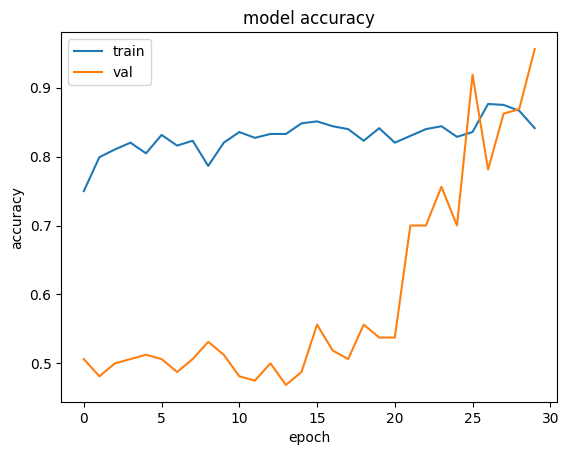

In [17]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()